In [1]:
import pandas as pd
import os
from sklearn import preprocessing
import time
from sklearn.cluster import KMeans
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import random
from sklearn.decomposition import PCA

C:\Users\yuto1\AppData\Roaming\Python\Python39\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
cu_path = os.getcwd()

## **1**

Before performing any dimensionality reduction, perform k-means clustering on the Madelon dataset. I tried the following k values: 4, 8, 16, 32, 64.

### 1

Since the scaling does matter in k-means clastering, I perform standardization for all the columns.

In [2]:
df = pd.read_csv("C:/Users/yuto1/Desktop/uc_davis/class/bax452/hw5/madelon.csv" , index_col=0)
display(df)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V491,V492,V493,V494,V495,V496,V497,V498,V499,V500
0,485,477,537,479,452,471,491,476,475,473,...,477,481,477,485,511,485,481,479,475,496
1,483,458,460,487,587,475,526,479,485,469,...,463,478,487,338,513,486,483,492,510,517
2,487,542,499,468,448,471,442,478,480,477,...,487,481,492,650,506,501,480,489,499,498
3,480,491,510,485,495,472,417,474,502,476,...,491,480,474,572,454,469,475,482,494,461
4,484,502,528,489,466,481,402,478,487,468,...,488,479,452,435,486,508,481,504,495,511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,493,458,503,478,517,479,472,478,444,477,...,469,475,485,443,517,486,474,489,506,506
2596,481,484,481,490,449,481,467,478,469,483,...,506,485,508,599,498,527,481,490,455,451
2597,485,485,530,480,444,487,462,475,509,494,...,442,474,502,368,453,482,478,481,484,517
2598,477,469,528,485,483,469,482,477,494,476,...,473,476,453,638,471,538,470,490,613,492


In [3]:
ss = preprocessing.StandardScaler()
sdf = ss.fit_transform(df)

### 2

When we don't perform the k-means clustering, the SSE is following..

In [4]:
base_square = 0
each_mean = np.mean(sdf, axis = 0)
for i in range(0,500):
  each_diff = sdf[:,i] - each_mean[i]
  each_square = np.sum(each_diff ** 2)
  base_square += each_square
print(base_square)

1300000.0


In [5]:
def cal_sum_square(kmeans , df):
  sum_squared = 0
  for i in kmeans.cluster_centers_[kmeans.labels_] - df:
    square = np.sum(i ** 2)
    sum_squared += square
  return sum_squared

In [6]:
sum_square_list = []
k_list = [4,8,16,32,64]
for i in k_list:
  start = time.perf_counter()
  kmeans = KMeans(n_clusters=i, random_state=0).fit(sdf)
  time_taken = time.perf_counter() - start
  sum_square = cal_sum_square(kmeans , sdf)
  sum_square_list.append(sum_square)
  print(f'Process time for k-means clustering when k = {i} is {time_taken} | SSE : {sum_square}')

Process time for k-means clustering when k = 4 is 1.4552373000000074 | SSE : 1277829.4497961341
Process time for k-means clustering when k = 8 is 2.2958373999999964 | SSE : 1268382.048714304
Process time for k-means clustering when k = 16 is 1.9292719999999974 | SSE : 1260483.221039883
Process time for k-means clustering when k = 32 is 2.868358299999997 | SSE : 1250937.1099298717
Process time for k-means clustering when k = 64 is 4.251191199999994 | SSE : 1233582.3162810234


As we can see from the result, we can describe that if we increase the number of clusters, then the process time will increase. On the contrary, the SSE will increase if we increase the number of clusters

### 3

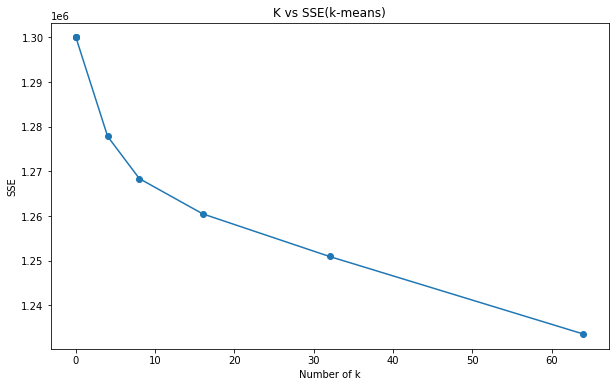

In [9]:
k_list.insert(0,0)
sum_square_list.insert(0,base_square)

plt.figure(figsize=(10,6))
plt.title("K vs SSE(k-means)")
plt.scatter(k_list, sum_square_list)
plt.plot(k_list, sum_square_list)
plt.xlabel("Number of k")
plt.ylabel("SSE")
plt.show()

As we can see from this plot, as we increase the number of k, then SSE decreases. However, the decreasing slope of SSE is sloqing down. Since the slope is very gradual after k=8, I will choose k=8 as for optimal k.

### 4

I changed the "init" parameter from "k-means++" to "random", so that centroids are all different.

In [10]:
sum_square_list = []
k_list = [8]
for i in k_list:
  start = time.perf_counter()
  kmeans = KMeans(n_clusters=i, random_state=0 , init = "random").fit(sdf)
  time_taken = time.perf_counter() - start
  sum_square = cal_sum_square(kmeans , sdf)
  sum_square_list.append(sum_square)
  print(f'Process time for k-means clustering with using random when k = {i} is {time_taken} | SSE : {sum_square}')

Process time for k-means clustering with using random when k = 8 is 0.8333713999999759 | SSE : 1268084.559728212


In 2 and 3, they set the cluster centroids by using "k-means++". This technique selects initial cluster centroids using sampling based on an empirical probability distribution of the points’ contribution to the overall inertia.

In this time, I change the "init" parameter from "k-means++" to "random". The result is shown above, and it tells us that sum of squared distance (SSE) of k-means with "random" is 1268084. 

Compared to the one in section(2)(3), which is "k-means++" in "init" parameter, it was 1268382. Therefore, the SSE of the k-means with "k-means++" was higher than that of one with "random"

### 5

Firstly, We can use BIC and AICc for determining the number of K. However, if we use these metrics, the number of K tends to be large and it may become complicated. Therefore, another useful metric might be using Elbow Rule.

## **2**
The Madelon dataset is high-dimensional, with 500 features per data point. Some of these features might be redundant or noisy, making clustering more difficult. Therefore, I performed PCA before running k-means clustering.

### 1

Since variable "sdf" is already standardized, so I will use this variable.

In [11]:
pca = PCA(n_components=500)
pca.fit(sdf)
variance_list = pca.explained_variance_.tolist()

In [12]:
ac_pca_variance = [sum(variance_list[:num+1]) for num , i in enumerate(variance_list)]
comp_list = [i for i in range(1,501)]

In [13]:
criteria = sum(variance_list) * 0.75

In [14]:
ac_pca_variance_check = [i for i in ac_pca_variance if i < criteria]
minimun_num_comp = len(ac_pca_variance_check) + 1

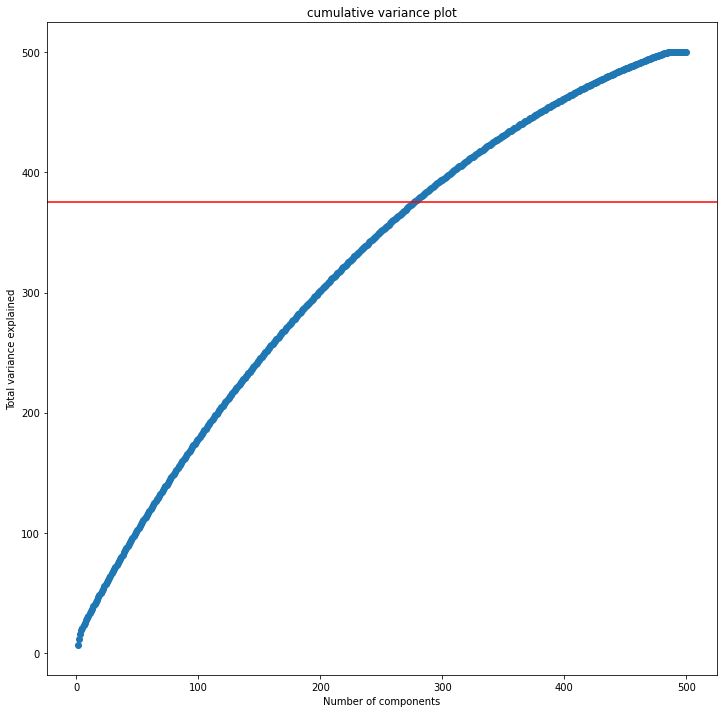

In [15]:
figure(figsize=(12, 12))
plt.title("cumulative variance plot")
plt.scatter(comp_list, ac_pca_variance)
plt.plot(comp_list, ac_pca_variance)
plt.axhline(y = criteria, color = 'r', linestyle = '-')
plt.xlabel("Number of components")
plt.ylabel("Total variance explained")
plt.show()

In [16]:
print(f"To retain at least 75 percent of the variance, we should keep at least {minimun_num_comp} components")

To retain at least 75 percent of the variance, we should keep at least 277 components


### 2

#### 1

In [17]:
pca = PCA(n_components=277)
pca.fit(sdf)
feature = pca.transform(sdf)
feature_df = pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(0,277)])

In [18]:
display(feature_df)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC268,PC269,PC270,PC271,PC272,PC273,PC274,PC275,PC276,PC277
0,-4.962292,-0.581816,-2.462262,-1.834536,0.016850,1.383584,0.264890,-1.661947,-1.222759,0.108636,...,0.963246,-1.327374,0.018477,0.577051,0.498196,-1.144518,-2.600848,0.911579,-0.197623,-0.110180
1,-0.460969,2.866363,0.039260,-1.385459,1.915482,-0.602192,-0.269907,-1.305887,-2.002561,1.135168,...,0.343642,-1.334202,0.336512,-0.505264,-0.099358,0.521194,0.358580,0.097703,0.196908,0.580555
2,1.127690,-2.238240,0.045563,0.478178,-1.961318,-0.529971,0.029435,1.119549,-0.331257,0.487745,...,0.848838,0.549390,0.621387,1.294301,1.347179,-0.658639,-0.412857,1.612794,-0.741904,-0.096724
3,2.892821,-1.863288,1.580523,-0.654626,1.256972,-0.017462,-0.844390,-0.333593,1.239472,1.471380,...,1.959334,-0.474288,-0.832198,-0.122641,-0.527079,-0.552427,2.132877,-1.366712,0.315687,-2.473207
4,-0.667374,1.914964,1.668195,-2.262866,-1.800030,1.139538,1.041393,1.441465,0.843772,-1.462119,...,-1.182444,0.367982,0.194270,0.493673,-0.539675,-1.475940,-1.174063,0.359148,0.510286,0.153763
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2595,1.648387,0.266518,-1.200256,-1.277638,0.525999,-0.512696,1.306954,-0.502210,-0.018037,2.839139,...,-1.106169,-0.065564,1.205180,-0.126225,0.472113,-0.449023,-0.018968,-0.730040,-0.735393,-0.624671
2596,-1.075991,-1.358502,1.813041,-2.062066,-2.442528,1.197443,-1.387484,-1.269173,-0.993607,1.441990,...,-0.380224,0.921905,1.000203,0.896720,0.301312,1.179018,0.010311,0.880016,-0.851059,-0.679933
2597,2.740068,1.759922,-2.918021,1.102017,-0.547716,2.135194,2.168944,-1.001597,1.159574,2.678895,...,0.360921,-1.616067,-0.907199,0.168121,1.310671,0.084048,-0.968640,0.062401,1.027564,0.739911
2598,1.319516,-2.664372,1.727486,-0.681349,0.940057,0.508477,-0.359905,0.047606,1.173654,0.254517,...,-0.173952,-1.327457,0.327377,0.819396,-1.952339,-0.116909,0.541442,-0.580448,0.881200,0.448605


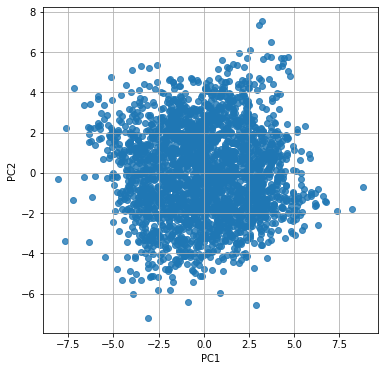

In [19]:
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

#### 2

In [20]:
pc1 = abs(pca.components_[0])
pc2 = abs(pca.components_[1])

pc_combine = pc1 + pc2
index_pc = pc_combine.argsort()[-2:]
print(index_pc)


pc1_most = sdf[:,index_pc[0]]
pc2_most = sdf[:,index_pc[1]]

[281 338]


In [21]:
display(sdf)
sdf.shape

array([[ 0.51613623, -0.21597363,  0.71307718, ..., -0.30556792,
        -0.90311629,  0.2087788 ],
       [ 0.19926393, -0.84235166, -1.27190663, ...,  0.64995023,
         0.04222888,  1.01890759],
       [ 0.83300853,  1.92689861, -0.26652522, ...,  0.42944604,
        -0.2548796 ,  0.28593392],
       ...,
       [ 0.51613623,  0.0477645 ,  0.5326241 , ..., -0.15856513,
        -0.66002753,  1.01890759],
       [-0.75135298, -0.47971175,  0.48106608, ...,  0.50294744,
         2.82424466,  0.05446855],
       [ 0.04082778, -1.00718799,  0.14593894, ...,  0.79695303,
         0.74448529,  1.36610564]])

(2600, 500)

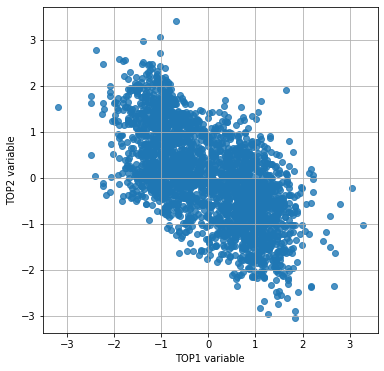

In [22]:
plt.figure(figsize=(6, 6))
plt.scatter(pc1_most, pc2_most, alpha=0.8)
plt.grid()
plt.xlabel("TOP1 variable")
plt.ylabel("TOP2 variable")
plt.show()

### 3

I cannot observe any specific pattern in the plot created in 2.2.1. The reason might be because that there are 277 components. Since there are lots of other components except for PC1 and PC2, it might be difficult to observe some specific pattern just with using PC1 and PC2.

However, we can observe some of the pattern in the plot of 2.2.2. Especially, this scatterplot shows that there is a downward trend to the right. This trend makes sense because in x-axis, I ploted the the variable which have the highest absolute combined loading. This means that TOP1 variable is more important than the TOP2 as for creating the new coordinate system.

## **3**
Now, we will run k-means clustering on the transformed data from the previous problem.

### 1

There are several reasons that performing PCA before performing k-means clustering is a good idea. The first reason is because by redusing the number of features to use in k-means in the process selecting the number of components, we might be able to reduce the noise and improve the performance of k-means clustering. The secodn reason is because we might also be able to reduce the computation time by limiting the number of components to use in k-means clustering,

### 2

#### 1

In [23]:
base_square = 0
each_mean = np.mean(feature, axis = 0)
for i in range(0,277):
  each_diff = feature[:,i] - each_mean[i]
  each_square = np.sum(each_diff ** 2)
  base_square += each_square
print(base_square)

966124.4646292777


In [24]:
sum_square_list = []
k_list = [4,8,16,32,64]
for i in k_list:
  start = time.perf_counter()
  kmeans = KMeans(n_clusters=i, random_state=0 , init = "random").fit(feature)
  time_taken = time.perf_counter() - start
  sum_square = cal_sum_square(kmeans , feature)
  sum_square_list.append(sum_square)
  print(f'Process time for k-means clustering when k = {i} is {time_taken} | SSE : {sum_square}')

Process time for k-means clustering when k = 4 is 0.24520749999999225 | SSE : 944217.2965116589
Process time for k-means clustering when k = 8 is 0.31603109999997514 | SSE : 934956.7053740509
Process time for k-means clustering when k = 16 is 0.48226640000001453 | SSE : 926641.5265371868
Process time for k-means clustering when k = 32 is 0.4671600000000353 | SSE : 917472.8301198632
Process time for k-means clustering when k = 64 is 0.5317805999999905 | SSE : 902684.4111370429


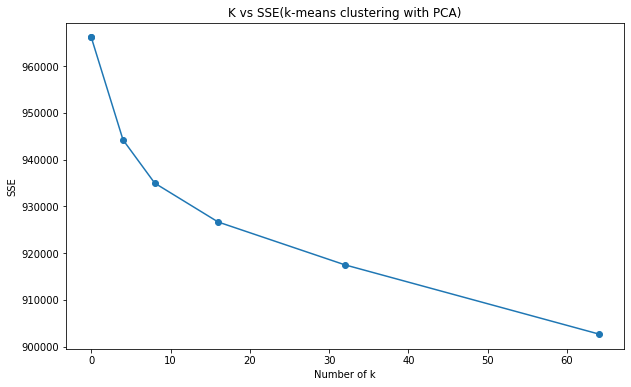

In [26]:
k_list.insert(0,0)
sum_square_list.insert(0,base_square)

plt.figure(figsize=(10,6))
plt.title("K vs SSE(k-means clustering with PCA)")
plt.scatter(k_list, sum_square_list)
plt.plot(k_list, sum_square_list)
plt.xlabel("Number of k")
plt.ylabel("SSE")
plt.show()

From this plot, we can describe that optimal K might be 8 because the slope of the graph changes significantly around K=8 and after k=8, and it becomes more gradual. This is result is the same to question (1).

#### 2

If we compare the SSE from the k-means without PCA and the one with PCA, we can describe that for any k, the SSE is smaller in the result of k-means clustering with PCA. In face, even when k=0 at k-means clustering with PCA, SSE was 960,000. However, when k=0 at k-means clustering without PCA, SSE was 1,300,000.

### 3

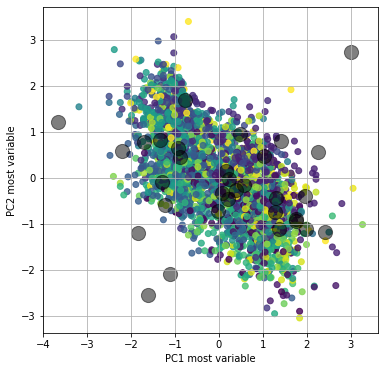

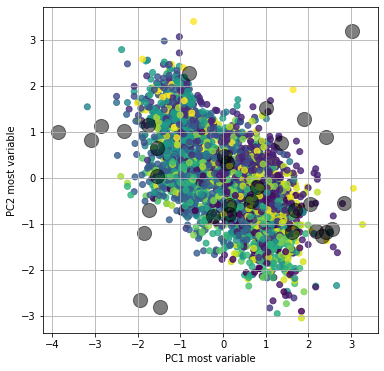

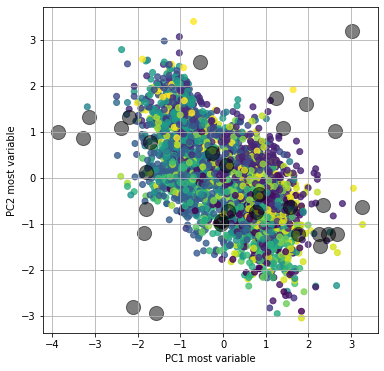

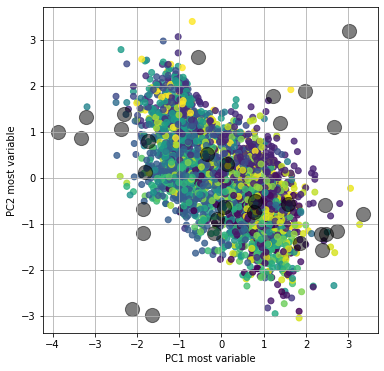

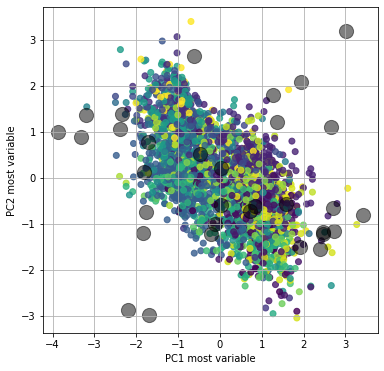

In [27]:
centroids = None
for i in range(10):
  kmeans = KMeans(n_clusters=32, random_state=0, max_iter=1,n_init=1,init = (centroids if centroids is not None else 'k-means++')).fit(feature)
  centroids = kmeans.cluster_centers_
  if i < 5:
    plt.figure(figsize=(6, 6))
    plt.scatter(pc1_most, pc2_most, alpha=0.8 , c = kmeans.labels_)
    plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, alpha=0.5)
    plt.grid()
    plt.xlabel("PC1 most variable")
    plt.ylabel("PC2 most variable")
    plt.show()

As we can see from the above plots, the central point is scattered with each interation. Therefore, I consider that algorithm begin to converge to optimal assignments.